### **Task 3**
Car Price Prediction

*   Import necessary libraries
*   Load Data

*   Perform Data Preprocessing

*   Plotting Graphs

*   Train Test Split

*   Model Fitting

*   Model Evaluation
*   Prediction on live Data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('oasiscar.txt')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [ ]:
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [ ]:
df['CarName'] = df["CarName"].apply(lambda x: x.split(" ")[0])

In [ ]:
df['CarName'].replace(to_replace='maxda', value='mazda', inplace=True)
df['CarName'].replace(to_replace='vokswagen', value='volkswagen', inplace=True)
df['CarName'].replace(to_replace='vw', value='volkswagen', inplace=True)
df['CarName'].replace(to_replace='toyouta', value='toyota', inplace=True)
df['CarName'].replace(to_replace='porcshce', value='porsche', inplace=True)
df['CarName'].replace(to_replace='nissan', value='Nissan', inplace=True)

In [ ]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df['CarName'].replace(to_replace='alfa-romero', value=0, inplace=True)
df['CarName'].replace(to_replace='audi', value=1, inplace=True)
df['CarName'].replace(to_replace='bmw', value=2, inplace=True)
df['CarName'].replace(to_replace='chevrolet', value=3, inplace=True)
df['CarName'].replace(to_replace='dodge', value=4, inplace=True)
df['CarName'].replace(to_replace='honda', value=5, inplace=True)
df['CarName'].replace(to_replace='isuzu', value=6, inplace=True)
df['CarName'].replace(to_replace='jaguar', value=7, inplace=True)
df['CarName'].replace(to_replace='mazda', value=8, inplace=True)
df['CarName'].replace(to_replace='buick', value=9, inplace=True)
df['CarName'].replace(to_replace='mercury', value=10, inplace=True)
df['CarName'].replace(to_replace='mitsubishi', value=11, inplace=True)
df['CarName'].replace(to_replace='Nissan', value=12, inplace=True)
df['CarName'].replace(to_replace='peugeot', value=13, inplace=True)
df['CarName'].replace(to_replace='plymouth', value=14, inplace=True)
df['CarName'].replace(to_replace='porsche', value=15, inplace=True)
df['CarName'].replace(to_replace='renault', value=16, inplace=True)
df['CarName'].replace(to_replace='saab', value=17, inplace=True)
df['CarName'].replace(to_replace='subaru', value=18, inplace=True)
df['CarName'].replace(to_replace='toyota', value=19, inplace=True)
df['CarName'].replace(to_replace='volkswagen', value=20, inplace=True)
df['CarName'].replace(to_replace='volvo', value=21, inplace=True)

In [ ]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
df['fueltype'].replace(to_replace='gas', value=0, inplace=True)
df['fueltype'].replace(to_replace='diesel', value=1, inplace=True)

In [ ]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
df['fuelsystem'].replace(to_replace='mpfi', value=0, inplace=True)
df['fuelsystem'].replace(to_replace='2bbl', value=1, inplace=True)
df['fuelsystem'].replace(to_replace='mfi', value=0, inplace=True)
df['fuelsystem'].replace(to_replace='1bbl', value=1, inplace=True)
df['fuelsystem'].replace(to_replace='spfi', value=0, inplace=True)
df['fuelsystem'].replace(to_replace='4bbl', value=1, inplace=True)
df['fuelsystem'].replace(to_replace='idi', value=0, inplace=True)
df['fuelsystem'].replace(to_replace='spdi', value=1, inplace=True)

In [ ]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
df['aspiration'].replace(to_replace='std', value=0, inplace=True)
df['aspiration'].replace(to_replace='turbo', value=1, inplace=True)

In [ ]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
df['doornumber'].replace(to_replace='two', value=2, inplace=True)
df['doornumber'].replace(to_replace='four', value=4, inplace=True)

In [ ]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df['carbody'].replace(to_replace='convertible', value=0, inplace=True)
df['carbody'].replace(to_replace='hatchback', value=1, inplace=True)
df['carbody'].replace(to_replace='sedan', value=2, inplace=True)
df['carbody'].replace(to_replace='wagon', value=3, inplace=True)
df['carbody'].replace(to_replace='hardtop', value=4, inplace=True)

In [ ]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df['drivewheel'].replace(to_replace='rwd', value=0, inplace=True)
df['drivewheel'].replace(to_replace='fwd', value=1, inplace=True)
df['drivewheel'].replace(to_replace='4wd', value=2, inplace=True)

In [ ]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df['enginelocation'].replace(to_replace='front', value=0, inplace=True)
df['enginelocation'].replace(to_replace='rear', value=1, inplace=True)

In [ ]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
df['enginetype'].replace(to_replace='dohc', value=0, inplace=True)
df['enginetype'].replace(to_replace='ohcv', value=1, inplace=True)
df['enginetype'].replace(to_replace='ohc', value=2, inplace=True)
df['enginetype'].replace(to_replace='l', value=3, inplace=True)
df['enginetype'].replace(to_replace='rotor', value=4, inplace=True)
df['enginetype'].replace(to_replace='ohcf', value=5, inplace=True)
df['enginetype'].replace(to_replace='dohcv', value=6, inplace=True)

In [ ]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df['cylindernumber'].replace(to_replace='four', value=4, inplace=True)
df['cylindernumber'].replace(to_replace='six', value=6, inplace=True)
df['cylindernumber'].replace(to_replace='five', value=5, inplace=True)
df['cylindernumber'].replace(to_replace='three', value=3, inplace=True)
df['cylindernumber'].replace(to_replace='twelve', value=12, inplace=True)
df['cylindernumber'].replace(to_replace='two', value=2, inplace=True)
df['cylindernumber'].replace(to_replace='eight', value=8, inplace=True)

In [ ]:
df.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        0         0           0           2        0   
1       2          3        0         0           0           2        0   
2       3          1        0         0           0           2        1   
3       4          2        1         0           0           4        2   
4       5          2        1         0           0           4        2   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           0               0       88.6  ...         130           0   
1           0               0       88.6  ...         130           0   
2           0               0       94.5  ...         152           0   
3           1               0       99.8  ...         109           0   
4           2               0       99.4  ...         136           0   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.corr()

car_ID  symboling   CarName  fueltype  aspiration  \
car_ID            1.000000  -0.151621  0.989349  0.125568    0.067729   
symboling        -0.151621   1.000000 -0.118794 -0.194311   -0.059866   
CarName           0.989349  -0.118794  1.000000  0.113191    0.054265   
fueltype          0.125568  -0.194311  0.113191  1.000000    0.401397   
aspiration        0.067729  -0.059866  0.054265  0.401397    1.000000   
doornumber        0.190352  -0.664073  0.164195  0.191491    0.031792   
carbody           0.168295  -0.398970  0.154998  0.157580    0.021276   
drivewheel       -0.051406   0.041671  0.004317 -0.132257   -0.066465   
enginelocation    0.051483   0.212471  0.054608 -0.040070   -0.057191   
wheelbase         0.129729  -0.531954  0.078505  0.308346    0.257611   
carlength         0.170636  -0.357612  0.119584  0.212679    0.234539   
carwidth          0.052387  -0.232919  0.003783  0.233880    0.300567   
carheight         0.255960  -0.541038  0.236233  0.284631    0.087311   
curbweight        0.071962  -0.227691  0.024015  0.217275    0.324902   
enginetype        0.097237   0.015797  0.147577  0.028837    0.014505   
cylindernumber   -0.094493  -0.113129 -0.125921 -0.024544   -0.047972   
enginesize       -0.033930  -0.105790 -0.070918  0.069594    0.108217   
fuelsystem       -0.240983   0.077331 -0.167239 -0.288002   -0.206345   
boreratio         0.260064  -0.130051  0.251140  0.054451    0.212614   
stroke           -0.160824  -0.008735 -0.201025  0.241829    0.222982   
compressionratio  0.150276  -0.178515  0.138828  0.984356    0.295541   
horsepower       -0.015006   0.070873 -0.055763 -0.163926    0.241685   
peakrpm          -0.203789   0.273606 -0.218655 -0.476883   -0.183383   
citympg           0.015940  -0.035823  0.053642  0.255963   -0.202362   
highwaympg        0.011255   0.034606  0.050022  0.191392   -0.254416   
price            -0.109093  -0.079978 -0.153948  0.105679    0.177926   

                  doornumber   carbody  drivewheel  enginelocation  wheelbase  \
car_ID              0.190352  0.168295   -0.051406        0.051483   0.129729   
symboling          -0.664073 -0.398970    0.041671        0.212471  -0.531954   
CarName             0.164195  0.154998    0.004317        0.054608   0.078505   
fueltype            0.191491  0.157580   -0.132257       -0.040070   0.308346   
aspiration          0.031792  0.021276   -0.066465       -0.057191   0.257611   
doornumber          1.000000  0.447534    0.098954       -0.137757   0.447357   
carbody             0.447534  1.000000   -0.056886        0.126546   0.368772   
drivewheel          0.098954 -0.056886    1.000000       -0.147865  -0.459745   
enginelocation     -0.137757  0.126546   -0.147865        1.000000  -0.187790   
wheelbase           0.447357  0.368772   -0.459745       -0.187790   1.000000   
carlength           0.398568  0.376842   -0.485649       -0.050989   0.874587   
carwidth            0.207168  0.191511   -0.470751       -0.051698   0.795144   
carheight           0.552208  0.483675    0.019719       -0.106234   0.589435   
curbweight          0.197379  0.240367   -0.575111        0.050468   0.776386   
enginetype          0.037170  0.127736    0.192637        0.323697  -0.136452   
cylindernumber     -0.016009  0.106245   -0.314006        0.183048   0.339507   
enginesize          0.020742  0.172381   -0.524307        0.196826   0.569329   
fuelsystem         -0.117539 -0.179239    0.480511       -0.106746  -0.526141   
boreratio           0.119258  0.224976   -0.481827        0.185042   0.488750   
stroke             -0.011082  0.000598   -0.071591       -0.138455   0.160959   
compressionratio    0.177888  0.156686   -0.127479       -0.019762   0.249786   
horsepower         -0.126947  0.047234   -0.518686        0.317839   0.353294   
peakrpm            -0.247668 -0.147031    0.039417        0.198461  -0.360469   
citympg            -0.012417 -0.095826    0.449581       -0.153487  -0.470414   
highwaympg         -0.0

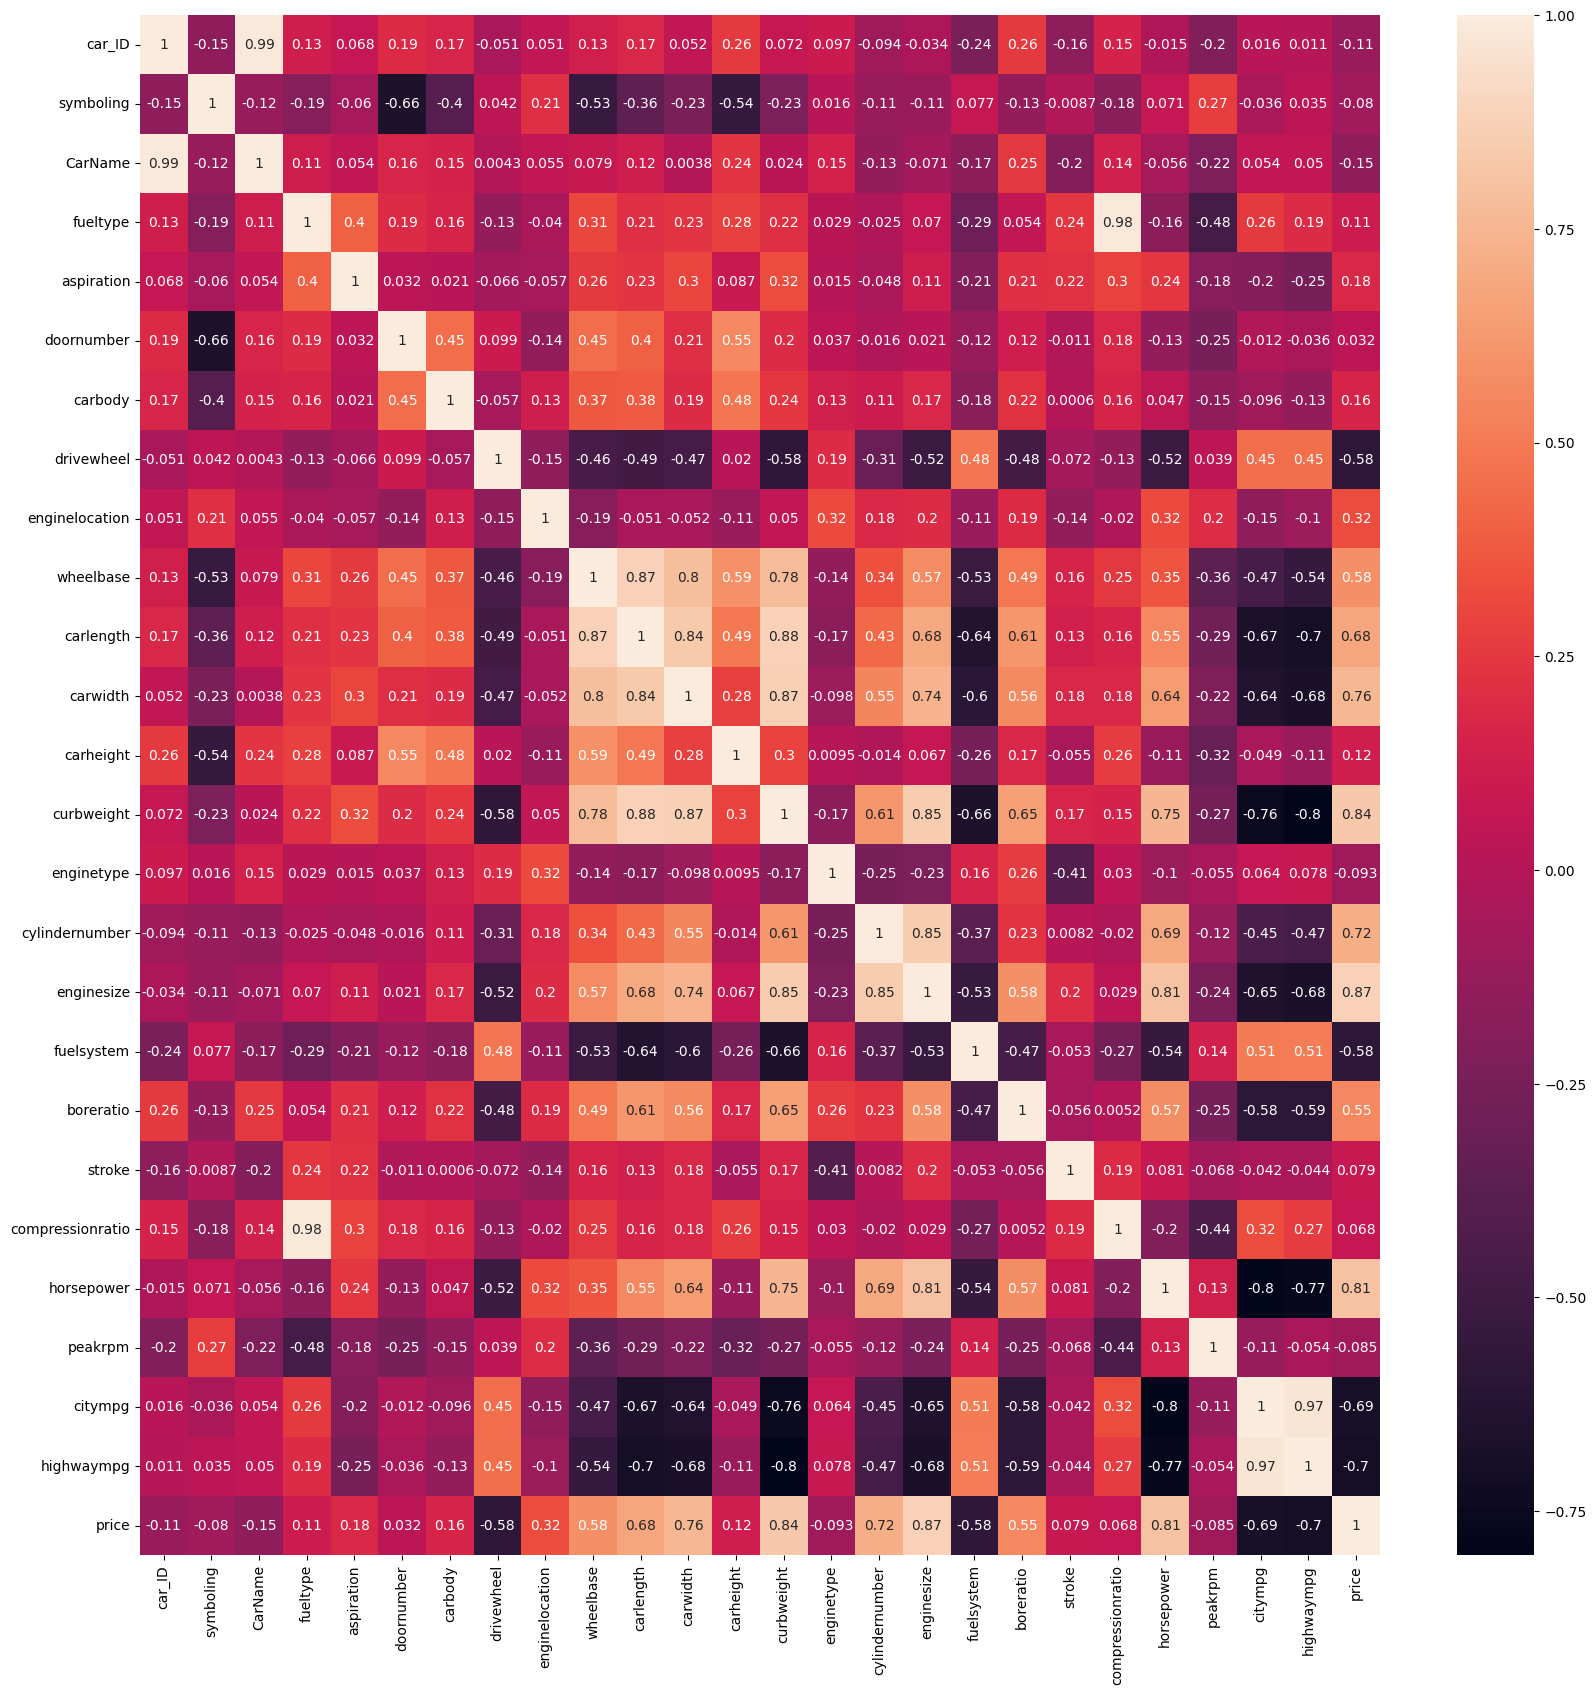

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

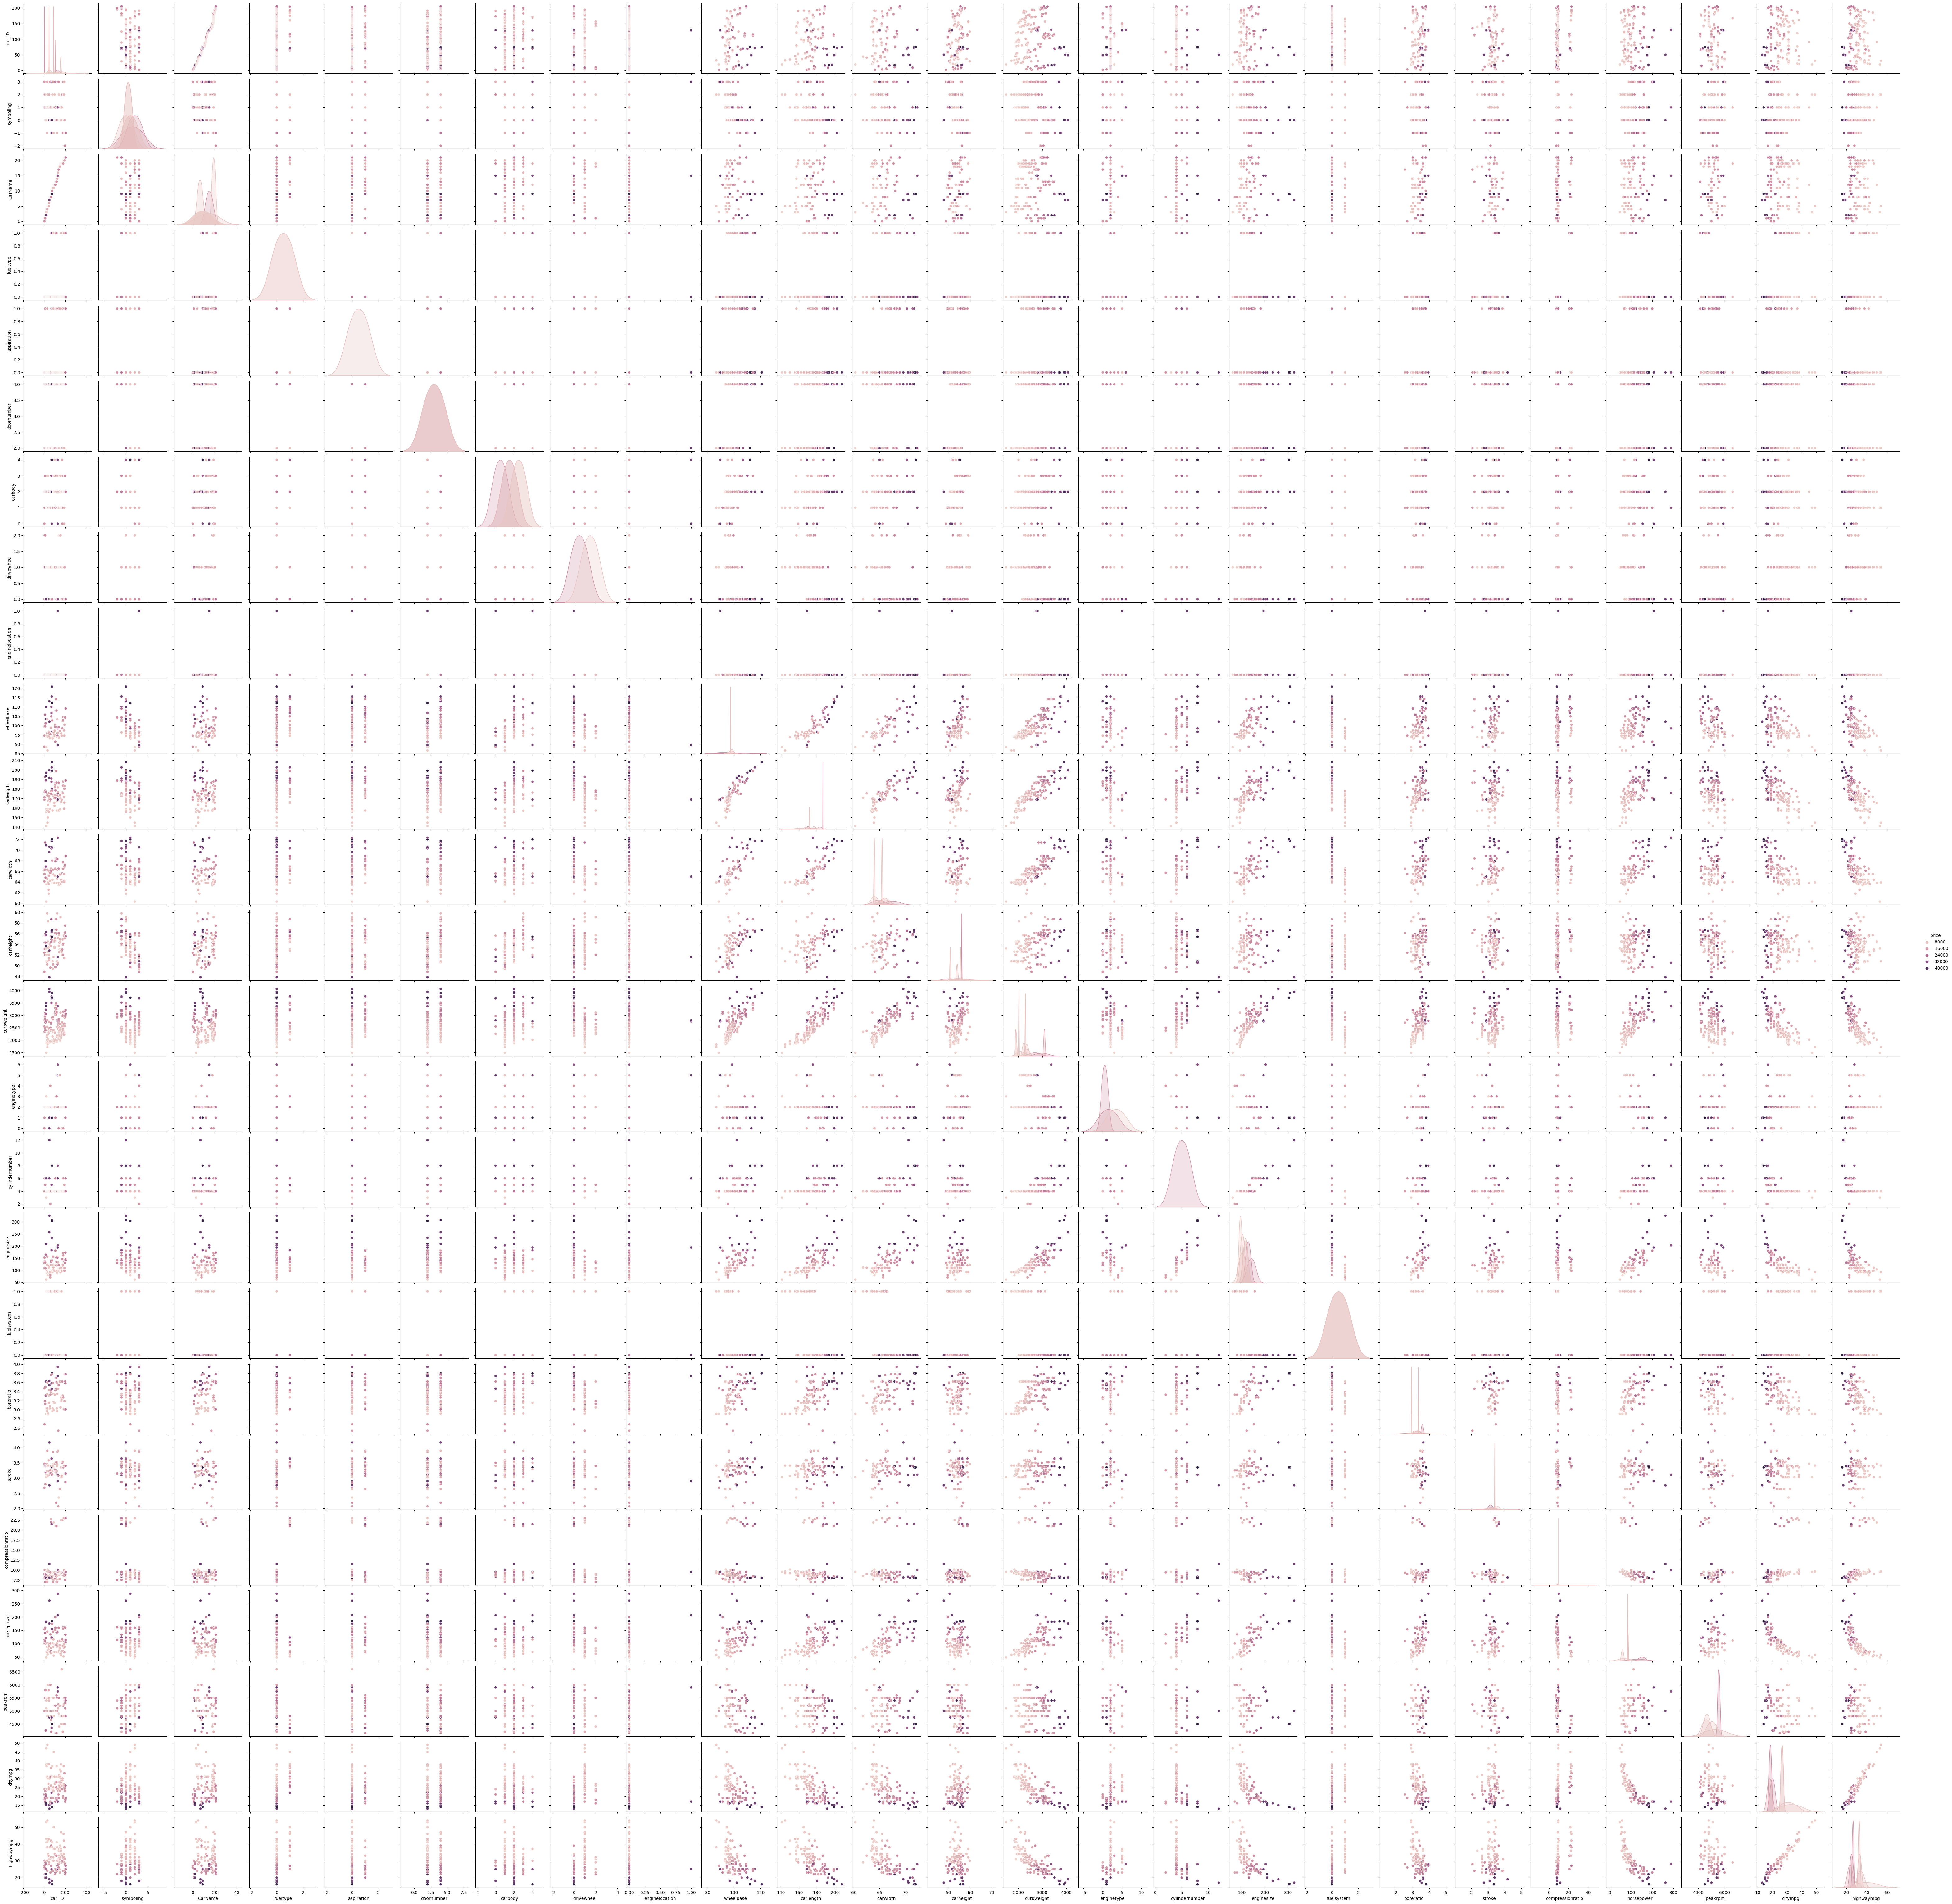

In [ ]:
sns.pairplot(data=df, hue='price')
plt.show()

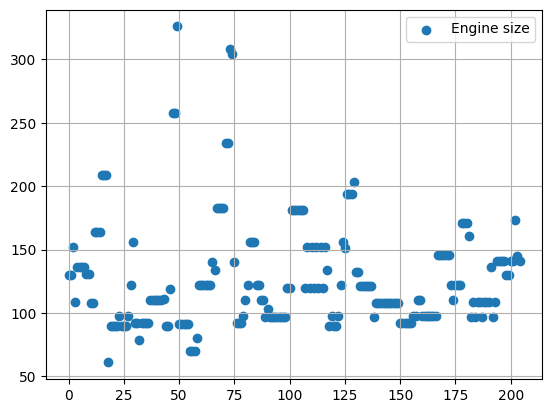

In [ ]:
plt.scatter (range (len(df)), list (df['enginesize']), label='Engine size')
plt.legend ()
plt.grid ()
plt.show ()

In [ ]:
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
X

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         1          3        0         0           0           2        0   
1         2          3        0         0           0           2        0   
2         3          1        0         0           0           2        1   
3         4          2        1         0           0           4        2   
4         5          2        1         0           0           4        2   
..      ...        ...      ...       ...         ...         ...      ...   
200     201         -1       21         0           0           4        2   
201     202         -1       21         0           1           4        2   
202     203         -1       21         0           0           4        2   
203     204         -1       21         1           1           4        2   
204     205         -1       21         0           1           4        2   

     drivewheel  enginelocation  wheelbase  ...  cylindernumber  enginesize  \
0             0               0       88.6  ...               4         130   
1             0               0       88.6  ...               4         130   
2             0               0       94.5  ...               6         152   
3             1               0       99.8  ...               4         109   
4             2               0       99.4  ...               5         136   
..          ...             ...        ...  ...             ...         ...   
200           0               0      109.1  ...               4         141   
201           0               0      109.1  ...               4         141   
202           0               0      109.1  ...               6         173   
203           0               0      109.1  ...               6         145   
204           0               0      109.1  ...               4         141   

     fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0             0       3.47    2.68               9.0         111     5000   
1             0       3.47    2.68               9.0         111     5000   
2             0       2.68    3.47               9.0         154     5000   
3             0       3.19    3.40              10.0         102     5500   
4             0       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200           0       3.78    3.15               9.5         114     5400   
201           0       3.78    3.15               8.7         160     5300   
202           0       3.58    2.87               8.8         134     5500   
203           0       3.01    3.40              23.0         106     4800   
204           0       3.78    3.15               9.5         114     5400   

     citympg  highwaympg  
0         21          27  
1         21          27  
2         19          26  
3         24          30  
4         18          22  
..       ...         ...  
200       23          28  
201       19          25  
202       18          23  
203       26          27  
204       19          25  

[205 rows x 25 columns]

In [ ]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1, test_size=0.2, shuffle=True)

In [ ]:
lr = LinearRegression().fit(X,y)
lr

LinearRegression()

In [ ]:
y_pred=lr.predict(X)
y_pred

array([15475.90852581, 15498.74409055, 20052.64307331, 13648.09234245,
       15396.31235128, 15710.35067036, 20633.98995025, 20459.69171672,
       21909.45138424, 17661.50732683, 14079.35711132, 14279.96169422,
       18173.98331333, 18514.26289596, 20476.28790123, 27822.39058723,
       27919.48121962, 31259.15864384,  2701.05424394,  7791.19501006,
        7618.17308864,  6923.26396367,  7317.8509536 ,  9430.51343481,
        7687.86723351,  7365.54008791,  7388.37565265,  9192.00484961,
       12624.35580471, 16388.30846211,  5478.73273407,  7797.14773588,
        6837.02443738,  8394.58606794,  8444.33598033,  8651.88789138,
        9387.45228535, 10855.60041809, 10967.58975942, 10871.6966458 ,
        9103.38084523, 11648.41412844, 10547.62751627,  8205.35783291,
        6788.00806776,  7071.06625099, 12856.78472918, 31511.60177626,
       31534.437341  , 41743.40153026,  6221.29585077,  6897.93446908,
        6929.18076746,  6665.81397618,  6506.5295844 ,  9668.64945076,
      

In [ ]:
ytest = pd.DataFrame({'Price':y_pred})
display(ytest)

Price
0    15475.908526
1    15498.744091
2    20052.643073
3    13648.092342
4    15396.312351
..            ...
200  17607.336402
201  19355.684219
202  21406.417521
203  19204.245461
204  19114.282864

[205 rows x 1 columns]

In [ ]:
r_sq = lr.score(X, y)
r_sq

0.8961414894604561